In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown

In [5]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')

len(dataset)

font_size_text = "<b>Z-score outlier removal</b>"
display(Markdown(font_size_text))


<b>Z-score outlier removal</b>

In [6]:
obes_data = data_obesity.iloc[:, 1].values #All rows, 1st column 
diab_data = data_diabetes.iloc[:, 1].values #All rows, 1st column 
inac_data = data_inactivity.iloc[:, 1].values #All rows, 1st column 

In [24]:
def detect_outliers(data):
    outliers_indices = []
    threshold = 3  # 3rd standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:  # beyond 3rd SD
            outliers_indices.append(i)
        
    return outliers_indices

inac_outliers_indices = detect_outliers(inac_data)
obes_outliers_indices = detect_outliers(obes_data)
diab_outliers_indices = detect_outliers(diab_data)

inac_outliers_set = set(inac_outliers_indices)
obes_outliers_set = set(obes_outliers_indices)
diab_outliers_set = set(diab_outliers_indices)

common_outliers_indices = inac_outliers_set.intersection(obes_outliers_set, diab_outliers_set)

if common_outliers_indices:
    print("Common outliers indices:", common_outliers_indices)
else:
    print("No common outliers indices.")

print(inac_outliers_indices)
print(obes_outliers_indices)
print(diab_outliers_indices)
print(len(dataset))

No common outliers indices.
[83, 95, 689, 1369]
[18, 20, 29, 38, 40, 155, 340, 362]
[10, 12, 34, 50, 157, 338, 478, 1028, 1040, 1052, 1059, 1171, 1462, 1467, 1476, 1812, 2029, 2082, 2328, 2349, 2360, 2376, 2381, 2412, 2421, 2427, 2994, 3021]
354


In [25]:
common_outliers_indices = set(inac_outliers_indices) & set(obes_outliers_indices) & set(diab_outliers_indices)

# Remove outliers from the original dataset
filtered_dataset = dataset.drop(index=list(common_outliers_indices))
len(common_outliers_indices)

0

In [140]:
font_size_text = "<h2>ddd outliers from common data</h2>"
display(Markdown(font_size_text))

<h2>Removing outliers from common data</h2>

In [167]:
inac_column = dataset.iloc[:, 1]  # Extracting the inactivity percentage column
obes_column = dataset.iloc[:, 2]
diab_column = dataset.iloc[:, 3]
# Find outliers indices
outliers_inac = (inac_column < lower_bound_inac) | (inac_column > upper_bound_inac)
outliers_obes = (obes_column < lower_bound_obes) | (obes_column > upper_bound_obes)
outliers_diab = (diab_column < lower_bound_diab) | (diab_column > upper_bound_diab)

all_outliers = outliers_inac | outliers_obes | outliers_diab
# Remove outliers
filtered_dataset = dataset.loc[~all_outliers]
filtered_dataset

0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353    False
Name: % INACTIVE, Length: 354, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353     True
Name: % OBESE, Length: 354, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353    False
Name: % DIABETIC, Length: 354, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353     True
Length: 354, dtype: bool


,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
348,51181,15.7,19.0,7.9
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9


In [176]:
X = filtered_dataset.iloc[:, 1:-1].values
y = filtered_dataset.iloc[:, -1].values

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [178]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

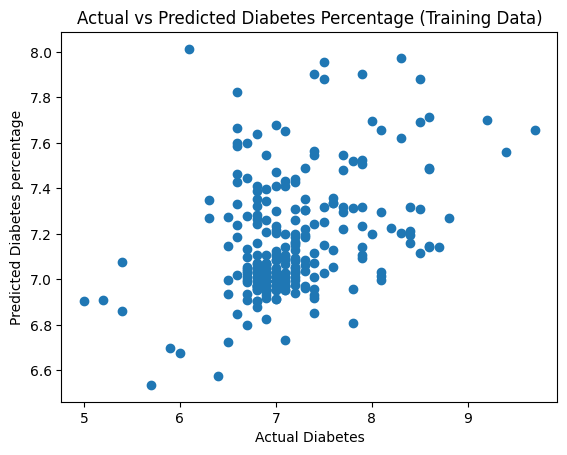

In [180]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [181]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.16362162357040266

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

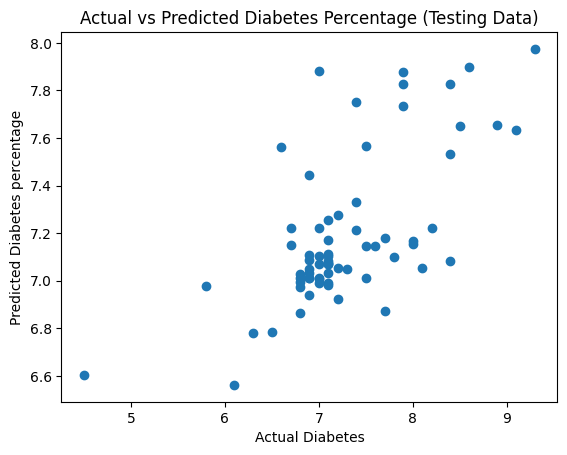

In [182]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [183]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.36748974920317756

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


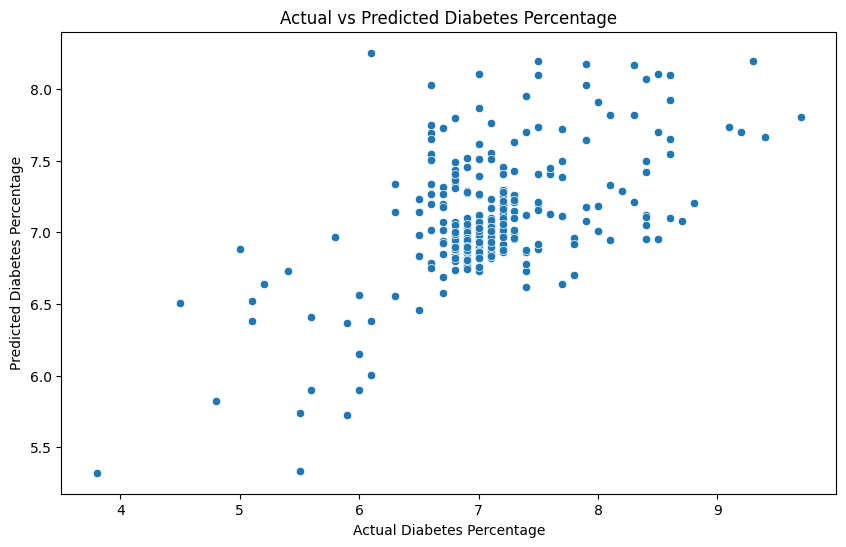

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('Actual vs Predicted Diabetes Percentage')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Predicted Diabetes Percentage')
plt.show()

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


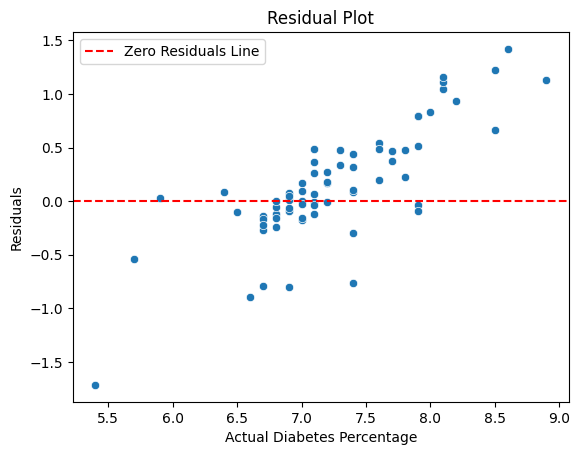

In [43]:
residuals = y_test - y_pred_test
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [44]:
squared_residuals = residuals**2

In [46]:
from sklearn.linear_model import LinearRegression

# Assuming X_test contains the independent variables
squared_regressor = LinearRegression()
squared_regressor.fit(X_test, squared_residuals)

#Why are we testing if the squared residuals can be predicted by the independent variables?
# The Breusch-Pagan test tests the hypothesis that the variance of the errors (residuals) in a regression model is constant across all levels of the independent variables. In other words, it checks for homoskedasticity, which is one of the assumptions of classical linear regression.
#If the variance of the residuals is constant (homoskedasticity), it means that the spread of the residuals is the same across all values of the independent variables. This is a key assumption for the validity of OLS (Ordinary Least Squares) estimates and their associated statistical tests.

# Predict the squared residuals
squared_residuals_pred = squared_regressor.predict(X_test)


In [50]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2


# Null Hypothesis (H0): There is no heteroskedasticity; the variance of the residuals is constant.

# The alternative hypothesis (what you are testing for) would be:

# Alternative Hypothesis (H1): There is heteroskedasticity; the variance of the residuals is not constant.


test_statistic = len(X_test) * mean_squared_error(squared_residuals, squared_residuals_pred) / 2
critical_value = chi2.ppf(0.95, df=1)

if test_statistic > critical_value:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity (fail to reject null hypothesis)")
    
print(test_statistic)

Heteroskedasticity detected (reject null hypothesis)
8.833687778045228


In [184]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cross_val_r2

array([-0.04,  0.13,  0.29,  0.18,  0.13])

In [53]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.2924070839879689
Standard Deviation of R-squared:  0.0940412889655816
Interquartile Range of R-squared:  0.05280956747528154


In [ ]:
# If the range, standard deviation, or IQR is relatively small, it suggests that the model's performance is consistent across different folds.
# If the range, standard deviation, or IQR is large, it indicates a higher variance in performance, and the model may be sensitive to the choice of training data.